### Group Members: Yuanjing Han, Youdan Shi, Jingning Li, Yunning Zhu----We collaborated with each other to finish this project and we're all satisfied with others' contribution.

# Project 3 - due Friday, 12/9 at 12pm
Work in groups of four people per project.

Select a dataset of at least 250,000 records, preferably at the level of individual transactions. Acquire the
data, survey it, wrangle it into a suitable format, and analyze it. Present your work in a brief (8-10 minute)
talk in class on Tuesday, 12/6, and write up your process and results in a reproducible notebook.

You may use any of the methods we studied in class: Unix command line tools, relational databases and
dimensional models with SQLite or PostgreSQL, or Spark. The datanotebook.org server will remain available
until the end of the semester and may be used for the project.

Attestation: All project team members should contribute meaningfully to the final results. Please attest to
your individual contributions and that each member contributed substantially to the project in your final
writeup.

Deadline: Friday, 12/9, 12pm. Submit your presentation (PDF export), your notebook, and any additionally
necessary files like scripts or images together in one zip file. Only one team member should submit on behalf
of all members. All team members should post their projects to GitHub for reviews after the deadline has
passed.

## Part 1 - Selection (30 points)
Identify and describe your dataset, its source, and what appeals to you about it. Acquire the data and
perform an initial exploration to determine which themes you wish to explore. Describe the questions you
want to be able to answer with the data, any concerns you have about the data, and any challenges you
expect to have to overcome.

## What is the dataset ?
### In this part, after a lot of comparison and discussion, we finally decided to explore Chicago Crime Dataset. (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) However, this dataset contains over 6 million records which is too big and all of us four we prefered narcotics related crimes than other type of crimes so we filtered this dataset to get the subset which we'd like to explore. This dataset helps communities make informed judgements about public safety and provides transparency into how police power is deing exercised. Below are the meanings of each column: 
* ID:Unique identifier for the record.
* Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident. 
* Date when the incident occurred. this is sometimes a best estimate.
* Block: The partially redacted address where the incident occurred, placing it on the same block as the actual address. 
* IUCR: The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.
* Primary Type: The primary description of the IUCR code.
* Description: The secondary description of the IUCR code, a subcategory of the primary description.
* Location Description: Description of the location where the incident occurred.
* Arrest: Indicates whether an arrest was made.
* Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
* Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area ¨C each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74. 
* District: Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.
* Ward: The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.
* Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6. 
* FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html. 
* X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
* Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
* Year: Year the incident occurred.
* Updated On: Date and time the record was last updated.
* Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
* Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
* Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.


In [ ]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2016-12-09 16:34:34--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

ows.csv?accessType=     [         <=>          ]  94.78M  2.26MB/s             

In [4]:
!mv rows.csv?accessType=DOWNLOAD Crime.csv

In [3]:
!wc -l Crime.csv

6220184 Crime.csv


In [4]:
!csvcut -n Crime.csv

  1: ID
  2: Case Number
  3: Date
  4: Block
  5: IUCR
  6: Primary Type
  7: Description
  8: Location Description
  9: Arrest
 10: Domestic
 11: Beat
 12: District
 13: Ward
 14: Community Area
 15: FBI Code
 16: X Coordinate
 17: Y Coordinate
 18: Year
 19: Updated On
 20: Latitude
 21: Longitude
 22: Location


## Why we choose this dataset? 
### More specificly, except the fact that we are interested in crime topic, this dataset contains few missing values in most of its columns and it contains transactional records which we're looking for.

## How we use this dataset? 
### We will build a star schema, then join the fact table with dimension tables to explore more questions. Specifically, we pay attention to three categories of questions, the time pattern of narcotics, the geographic pattern of narcotics crime, the relationship between police power and narcotics crime frequency. There are missing values in several columns which we'll deal with and since there are many attributes in this dataset, maybe for some specific attribute it's hard to choose to put it in fact table or in a dimension table. 

## Part 2 - Wrangling (35 points)
Based on what you found above, wrangle the data into a format suitable for analysis. This may involve
cleaning, filtering, merging, and modeling steps, any and all of which are valid for this project. Describe your
process as you proceed, and document any scripts, databases, or other models you develop. Be specific about
any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make
about the meaning of variables and their values.

Verify that your wrangling steps have succeeded (for example, if you loaded the data into a dimensional
model, ensure that the fact table contains the right number of records).

## Stage One: In this stage, we wrangle the dataset into a format suitable for later analysis. For instance, we filter data in order to select the part we prefer to analyze. We also handle null values.

### Step1.1. We filter data from the dataset. We choose only narcotics crime data.

In [5]:
!csvcut Crime.csv | csvgrep -c6 -m 'NARCOTICS' > narcotics.csv

In [6]:
!wc -l  narcotics.csv

686028 narcotics.csv


In [ ]:
import pandas as pd
df_crime = pd.read_csv('narcotics.csv',parse_dates = ['Date','Updated On'],error_bad_lines=False)

Count how many missing values there are in each columns.

In [ ]:
df_crime.isnull().sum()

In [ ]:
df_crime.dtypes

### Step1.2. We create and connect to a new database.

In [7]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [8]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [9]:
!createdb -U dbuser Final

In [10]:
%sql postgresql://dbuser@localhost:5432/Final

'Connected: dbuser@Final'

Use shuf and csvstat to take a subsample of the dataset and analyze it so that we can briefly learn about our data.

In [11]:
!shuf -n 50000 narcotics.csv | csvstat

  1. 7299441
	<class 'int'>
	Nulls: False
	Min: 1322053
	Max: 10766772
	Sum: 281725867309
	Mean: 5634630.038780776
	Median: 5494041
	Standard Deviation: 2642967.949520714
	Unique values: 49999
  2. HS103409
	<class 'str'>
	Nulls: False
	Unique values: 49999
	Max length: 8
  3. 01/03/2010 04:55:00 PM
	<class 'datetime.datetime'>
	Nulls: False
	Min: 2001-01-01 13:35:00
	Max: 2016-11-28 11:45:00
	Unique values: 49302
	5 most frequent values:
		2001-12-07 11:22:30:	5
		2006-02-16 09:10:04:	4
		2006-08-28 07:30:00:	4
		2003-10-09 07:30:00:	4
		2007-01-22 11:00:00:	4
  4. 049XX W MADISON ST
	<class 'str'>
	Nulls: False
	Unique values: 14596
	5 most frequent values:
		033XX W FILLMORE ST:	143
		005XX E BROWNING AVE:	124
		023XX S STATE ST:	103
		038XX W ROOSEVELT RD:	99
		036XX S FEDERAL ST:	86
	Max length: 35
  5. 2028
	<class 'int'>
	Nulls: False
	Min: 1811
	Max: 2170
	Sum: 96849665
	Mean: 1937.0320406408127
	Median: 2017
	Standard Deviation: 116.77813697813845
	Unique values: 47
	5 most fr

### Step1.3. We define a database table in the database and load this dataset into the database.

In [12]:
%%sql
DROP TABLE IF EXISTS Narcotics;
CREATE TABLE Narcotics (
    ID INTEGER,
    Case_Number CHAR(15),
    Date TIMESTAMP,
    Block VARCHAR(40),
    IUCR INTEGER,
    Primary_Type CHAR(15),
    Description VARCHAR(100),
    Location_Description VARCHAR(100),
    Arrest VARCHAR(5),
    Domestic VARCHAR(5),
    Beat CHAR(4),
    District CHAR(3),
    Ward INTEGER,
    Community_Area INTEGER,
    FBI_Code INTEGER,
    X_Coordinate INTEGER,
    Y_Coordinate INTEGER,
    Year INTEGER,
    Updated_On TIMESTAMP,
    Latitude FLOAT,
    Longitude FLOAT,
    Location VARCHAR(35)
);

Done.
Done.


[]

In [13]:
%%sql
COPY Narcotics FROM '/home/jovyan/work/narcotics.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

686027 rows affected.


[]

### Step1.4. We run a COUNT(*) query to verify that all the data has loaded correctly.

In [14]:
%%sql
SELECT COUNT(*) FROM Narcotics;

1 rows affected.


count
686027


### Step1.5. Drop columns which we'll not use for futher analysis: Case number(a second unique idetifier), Primary type(narcotics), Domestic, FBI code, X coordinate and Y coordinate, Updated_On and Location.

In [15]:
%%sql
ALTER TABLE Narcotics
DROP Case_Number, 
DROP Primary_Type,
DROP Domestic,
DROP FBI_Code,
DROP X_Coordinate,
DROP Y_Coordinate,
DROP Updated_On,
DROP Location;

Done.


[]

### Step1.6. We handle null values which is to set their values to 999.

In [ ]:
%%sql
UPDATE Narcotics
SET Location_Description = 999   
WHERE Location_Description IS NULL;    

In [ ]:
%%sql
UPDATE Narcotics
SET District = 999   
WHERE District IS NULL;    

In [16]:
%%sql
UPDATE Narcotics
SET Ward = 999    
WHERE Ward IS NULL;   

67321 rows affected.


[]

In [17]:
%%sql
UPDATE Narcotics
SET Community_Area = 999    
WHERE Community_Area IS NULL; 

67419 rows affected.


[]

In [18]:
%%sql
UPDATE Narcotics
SET Latitude = 999    
WHERE Latitude IS NULL;   

9888 rows affected.


[]

In [19]:
%%sql
UPDATE Narcotics
SET Longitude = 999    
WHERE Longitude IS NULL;

9888 rows affected.


[]

In [20]:
%%sql
SELECT * 
FROM Narcotics
LIMIT 3;

3 rows affected.


id,date,block,iucr,description,location_description,arrest,domestic,beat,district,ward,community_area,year,updated_on,latitude,longitude
6263247,2008-05-07 16:10:00,053XX S KEDZIE AVE,1811,POSS: CANNABIS 30GMS OR LESS,STREET,true,false,0822,008,14,63,2008,2015-08-17 15:03:40,0.0,0.0
6323488,2008-06-04 12:35:00,025XX N MILWAUKEE AVE,2014,MANU/DELIVER: HEROIN (WHITE),PARKING LOT/GARAGE(NON.RESID.),true,false,1414,014,35,22,2008,2015-08-17 15:03:40,0.0,0.0
6339707,2008-06-19 12:23:00,005XX E 47TH ST,2017,MANU/DELIVER:CRACK,SIDEWALK,true,false,0222,002,3,38,2008,2015-08-17 15:03:40,0.0,0.0


## Stage2. In this stage, we create a fact table and dimension tables. The reason why we choose star schema is that  we want to use simpler queries based on a star schema model which will improve performance for aggregation operations. After we build a star schema, we can explore more reasonable questions by joining a fact table with deminsion tables.  

### Step2.1. We create a location dimension table.

In [21]:
%%sql
DROP TABLE IF EXISTS Location;
CREATE TABLE Location(
    location_key SERIAL,
    Block VARCHAR(40),
    Location_Description VARCHAR(100),
    Ward INTEGER,
    Community_Area INTEGER,
    CONSTRAINT pk_location_key PRIMARY KEY(location_key)
);

Done.
Done.


[]

In [22]:
%%sql
INSERT INTO Location (Block, Location_Description, Ward, Community_Area)
SELECT DISTINCT Block, Location_Description, Ward, Community_Area
FROM Narcotics;

130808 rows affected.


[]

In [23]:
%%sql
SELECT * FROM location
LIMIT 5;

5 rows affected.


location_key,block,location_description,ward,community_area
1,0000X I94/EXIT 12,VEHICLE NON-COMMERCIAL,27,0
2,0000X E 100 PL,RESIDENCE,0,0
3,0000X E 100 PL,SIDEWALK,0,0
4,0000X E 100 PL,STREET,0,0
5,0000X E 100 ST,RESIDENCE,0,0


### Step2.2. we build a time dimension table.

In [24]:
%%sql
DROP TABLE IF EXISTS Time;
CREATE TABLE Time (
    Time_key SERIAL,
    year_create CHAR(4), 
    quarter_create CHAR(1), 
    month_create CHAR(2), 
    day_create CHAR(2), 
    day_of_week_str_create VARCHAR(10), 
    day_of_week_create CHAR(1),
    is_weekend_create CHAR(1),
    is_weekday_create CHAR(1),
    hour_24_create CHAR(2),
    CONSTRAINT pk_Time_key PRIMARY KEY(Time_key)
);

Done.
Done.


[]

In [25]:
%%sql
INSERT INTO Time (year_create, quarter_create, month_create, day_create, day_of_week_str_create, day_of_week_create,
                  is_weekend_create, is_weekday_create, hour_24_create)
SELECT DISTINCT 
    TO_CHAR(date, 'YYYY') AS year_create,
    TO_CHAR(date, 'Q') AS quarter_create,
    TO_CHAR(date, 'MM') AS month_create,
    TO_CHAR(date, 'DD') AS day_create,
    TO_CHAR(date, 'Day') AS day_of_week_str_create,
    TO_CHAR(date, 'D') AS day_of_week_create,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) >= 6 
        THEN 1 
        ELSE 0
    END AS is_weekend_create,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) < 6 
        THEN 1 
        ELSE 0
    END AS is_weekday_create,
    TO_CHAR(date, 'HH24') AS hour_24_create
FROM Narcotics;

123773 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM Time
LIMIT 2;

### Step2.3. We create a dimension table in terms of types of narcotic crimes.

In [27]:
%%sql
DROP TABLE IF EXISTS Type;
CREATE TABLE Type(
    Type_key SERIAL,
    IUCR INTEGER,
    Description VARCHAR(100),
    CONSTRAINT pk_Type_key PRIMARY KEY(Type_key)
);

Done.
Done.


[]

In [28]:
%%sql
INSERT INTO Type (IUCR, Description)
SELECT DISTINCT IUCR, Description
FROM Narcotics;

48 rows affected.


[]

Since we think there should be a trend from 2001 to 2016 of different narcotics --- for example, METHAMPHETAMINES is very new compared to other types of narcotics. We added a new column---'Narcotics_type' to the dimension table which recategorizes each crime into its corresponding narcotics categories and we'll use this column later to analyze the trend of each narcotics.

In [ ]:
%%sql
ALTER TABLE Type
ADD Narcotics_type VARCHAR(20); 

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'Unknown'

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'CANNABIS'
WHERE Description LIKE  '%CANNABIS%'

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'CRACK'
WHERE Description LIKE  '%CRACK%'

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'COCAINE'
WHERE Description LIKE  '%COCAINE%'

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'HEROIN'
WHERE Description LIKE  '%HEROIN%'

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'HALLUCINOGENS'
WHERE Description LIKE  '%HALLUCINOGENS%'

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'PCP'
WHERE Description LIKE  '%PCP%'

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'SYNTHETIC DRUGS'
WHERE Description LIKE  '%SYNTHETIC DRUGS%'

In [ ]:
%sql
UPDATE Type
SET Narcotics_type = 'BARBITUATES'
WHERE Description LIKE  '%BARBITUATES%'

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'AMPHETAMINES'
WHERE Description LIKE  '%AMPHETAMINES%'

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'METHAMPHETAMINES'
WHERE Description LIKE  '%METHAMPHETAMINES%'

In [ ]:
%%sql
UPDATE Type
SET Narcotics_type = 'MARIJUANA'
WHERE Description LIKE  '%MARIJUANA%'

In [ ]:
%%sql
SELECT * FROM Type
LIMIT 2;

### Step2.4. We create a dimension table of Police_Power.

In [30]:
%%sql
DROP TABLE IF EXISTS Police_Power;
CREATE TABLE Police_Power(
    Police_Power_key SERIAL,
    Beat CHAR(4),
    District CHAR(3),
    CONSTRAINT pk_Police_Power_key PRIMARY KEY(Police_Power_key)
);

Done.
Done.


[]

In [31]:
%%sql
INSERT INTO Police_Power (Beat, District)
SELECT DISTINCT Beat, District
FROM Narcotics;

459 rows affected.


[]

In [32]:
%%sql
SELECT * FROM Police_Power
LIMIT 3;

3 rows affected.


police_power_key,beat,district
1,1523,015
2,1223,012
3,1831,018


### Step2.5. We create a fact table.

In [33]:
%%sql
DROP TABLE IF EXISTS Narcotics_fact;
CREATE TABLE Narcotics_fact (
    ID INTEGER,
    location_key INTEGER,
    Time_key INTEGER,
    Type_key INTEGER,
    Police_Power_key INTEGER,
    Date TIMESTAMP,
    Latitude FLOAT,
    Longitude FLOAT,
    Arrest VARCHAR(5),
    FOREIGN KEY(location_key) REFERENCES Location(location_key),
    FOREIGN KEY(Time_key) REFERENCES Time(Time_key),
    FOREIGN KEY(Type_key) REFERENCES Type(Type_key),
    FOREIGN KEY(Police_Power_key) REFERENCES Police_Power(Police_Power_key)
);

Done.
Done.


[]

In [34]:
%%sql
INSERT INTO Narcotics_fact (ID, location_key, Time_key, Type_key, Police_Power_key, Date,Latitude, Longitude,Arrest)
SELECT ID, location_key, Time_key, Type_key, Police_Power_key, Date, Latitude, Longitude, Arrest
FROM Narcotics
LEFT JOIN
Location
ON Narcotics.Block = Location.Block
AND Narcotics.Location_Description = Location.Location_Description
AND Narcotics.Ward = Location.Ward
AND Narcotics.Community_Area = Location.Community_Area
LEFT JOIN
Type
ON Narcotics.IUCR = Type.IUCR
AND Narcotics.Description = Type.Description
LEFT JOIN 
Police_Power
ON Narcotics.Beat = Police_Power.Beat
AND Narcotics.District = Police_Power.District
LEFT JOIN
Time
ON TO_CHAR(date, 'YYYY') = Time.year_create
AND TO_CHAR(date, 'Q') = Time.quarter_create
AND TO_CHAR(date, 'MM') = Time.month_create
AND TO_CHAR(date, 'DD') = Time.day_create
AND TO_CHAR(date, 'Day')  = Time.day_of_week_str_create
AND TO_CHAR(date, 'HH24') = Time.hour_24_create;

686027 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM Narcotics_fact
LIMIT 2;

In [2]:
from IPython.display import Image
Image(url = "https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/JingningLi/master/Final_star%2Bschema.png", width=1000, height=1000)

## Questions:
### 1. What are the most common narcotics crime over these years?
### 2. What percentage of narcotics crime ends in arrest in each year from 2001 to 2016?
### 3. the trend of and proportion of Narcotics type from 2001 to 2016

### 4. What is the trend of the narcotics crime frequency from 2001 to 2016?
### 5. Narcotics crime tend to occur in which time period of day/week?

### 6. Geographic ''POSS: SYNTHETIC DRUGS'' Clusters
### 7. Mapping  ''POSS: SYNTHETIC DRUGS''
### 8. What is the most dangerous ward from 2001 to 2016?

### 9. Relationship between beat number and crime frequency among different wards.
### 10 Relationship between beat number and arrested crime number among different wards.

### Part 3 - Analysis (35 points)
Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1
with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover,
discussing them and whether the results match your expectations. Include charts or other visuals that support
your analysis. You may use Tableau, ggplot, or other tools we have not covered in class for visualization, but
be sure to export images and to include them properly in your writeup.

### In this part, we analyze data which we previously wrangled. Then, by using star schema, we explored seven questions which based on those three blocks:  the time pattern of narcotics, the geographic pattern of narcotics crime, the relationship between police power and narcotics crime frequency. Finally, we get reasonable answers and try to provide recommendations.

### Question1. What are the most common narcotics crime over these years?

In [38]:
%%sql
SELECT Description, COUNT(Description) AS Frequency
FROM Narcotics_fact
LEFT JOIN Type
ON Narcotics_fact.Type_key = Type.Type_key
GROUP BY Description
ORDER BY Frequency DESC
;

48 rows affected.


description,frequency
POSS: CANNABIS 30GMS OR LESS,274037
POSS: CRACK,116765
POSS: HEROIN(WHITE),87372
SOLICIT NARCOTICS ON PUBLICWAY,26050
POSS: COCAINE,23615
MANU/DELIVER:CRACK,23185
MANU/DELIVER: HEROIN (WHITE),22459
ATTEMPT POSSESSION NARCOTICS,21226
POSS: CANNABIS MORE THAN 30GMS,16072
FOUND SUSPECT NARCOTICS,14464


([<matplotlib.patches.Wedge at 0x7f9c5108a438>,
  <matplotlib.text.Text at 0x7f9c5112c710>])

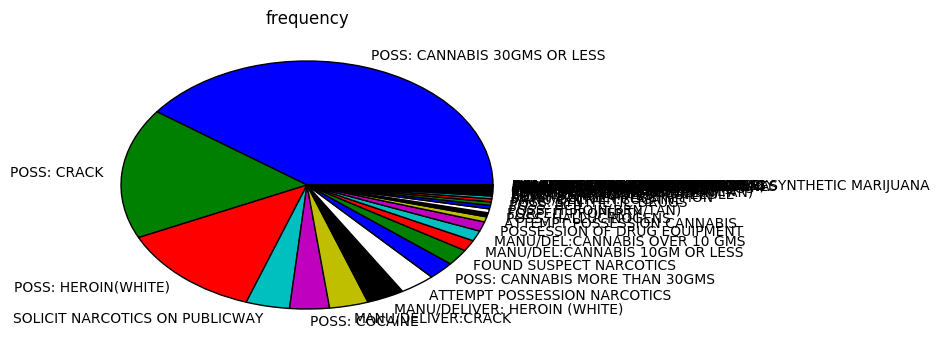

In [39]:
result = _
result.pie()

### Conclusion 1. The chart shows frequency of each kind of narcotics crime types. It is obvious that type "POSS: CANNABIS 30GMS OR LESS" is the most common narcotics crime over these years.

### 2. What percentage of narcotics crime ends in arrest in each year from 2001 to 2016?

In [47]:
%%sql
SELECT created_year_total AS created_year, (cast(arrest_num_per_year as double precision)/total_num_per_year) AS arrest_rate
FROM(
    (SELECT year_create AS created_year_total ,COUNT(*) AS total_num_per_year
    FROM Narcotics_fact
    LEFT JOIN Time
    ON Narcotics_fact.Time_key = Time.Time_key
    GROUP BY year_create
    ORDER BY year_create) AS a
    INNER JOIN
    (SELECT year_create AS created_year_arrest, COUNT(*) AS arrest_num_per_year
    FROM Narcotics_fact
    LEFT JOIN Time
    ON Narcotics_fact.Time_key = Time.Time_key
    WHERE Narcotics_fact.arrest Like 'true'
    GROUP BY year_create
    ORDER BY year_create) AS b
    ON a.created_year_total = b.created_year_arrest)AS c;

16 rows affected.


created_year,arrest_rate
2001,0.999841794055412
2002,0.999845527042422
2003,0.999907898614795
2004,0.999544339291973
2005,0.997990539531244
2006,0.98966190672424
2007,0.977907959011276
2008,0.977465757842905
2009,0.991961968628712
2010,0.997718526029544


### Conclusion 2. First, the concept "arrest_rate" means number of crimes end in arrest divided by total number of narcotics crime. Second, the result presents that the arrest_rate over these years approximately approach 100%,  that means almost all narcotics criminals would be caught.

### 3. What is the trend of  Narcotics type from 2001 to 2016

In [ ]:
%%sql
SELECT year_create, narcotics_type, COUNT(narcotics_type) AS Frequency
FROM Narcotics_fact
LEFT JOIN Type
ON Narcotics_fact.Type_key = Type.Type_key
LEFT JOIN TIME
ON Narcotics_fact.Time_key = Time.Time_key
WHERE Narcotics_type != 'Unknown'
GROUP BY year_create, Narcotics_type
ORDER BY year_create
;

In [ ]:
df = _.DataFrame()
df.dtypes

In [ ]:
! pip install seaborn

In [ ]:
import seaborn as sns
fig = sns.factorplot(x='year_create', y='frequency', hue='narcotics_type', data=df, size=15)
fig.set_xticklabels(rotation=30)

### Conclusion3. In this line chart, we can see that the trend of different narcotics types from 2001 to 2016. Overall, cannabis, crack and heroin are the main stream of narcotics crime. Cannabis have a trend of increase from 2001 to 2007. With the effect of economic crisis, the frequency of Cannabis decreased in 2008 but increased a little in 2009. Since 2009, it has been decreasing. However, overall Cannabis still is the most  main stream of narcotics crime. 

### 4. What the trend of the narcotics crime frequency these years?

In [36]:
%%sql
SELECT year_create, COUNT(year_create) AS Frequency
FROM Narcotics_fact
LEFT JOIN Time
ON Narcotics_fact.Time_key = Time.Time_key
GROUP BY year_create
ORDER BY year_create
;

16 rows affected.


year_create,frequency
2001,50567
2002,51789
2003,54288
2004,57060
2005,56234
2006,55813
2007,54454
2008,46507
2009,43543
2010,43393


In [ ]:
import sqlalchemy as sq
con = sq.create_engine("postgresql+psycopg2://dbuser@localhost:5432/Final")

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
sql = '''
    SELECT year_create, COUNT(year_create) AS Frequency
    FROM Narcotics_fact
    LEFT JOIN Time
    ON Narcotics_fact.Time_key = Time.Time_key
    GROUP BY year_create
    ORDER BY year_create;
    '''
df = pd.read_sql(sql,con)
sns.barplot(x='year_create', y='frequency', data=df)
plt.xticks(rotation=90)

### Conclusion4. In this bar chart, we can see that the trend of narcotics crime frequency is going up from 2001 and peak in 2004. After that, the number of narcotics crime is continuously decreeasing. Finally, it stands at a lower level in 2016.

### 5. Narcotics crime tend to occur in which time period of day/week?

In [48]:
%%sql
SELECT day_of_week_str_create, COUNT(*) AS number_of_Narcotics_Crime 
FROM Narcotics_fact
LEFT JOIN Time
ON Narcotics_fact.Time_key = Time.Time_key
GROUP BY day_of_week_str_create
ORDER BY number_of_Narcotics_Crime DESC;

7 rows affected.


day_of_week_str_create,number_of_narcotics_crime
Friday,105769
Thursday,104863
Wednesday,104570
Tuesday,103055
Saturday,93474
Monday,92941
Sunday,81355


In [49]:
%%sql
SELECT hour_24_create, COUNT(*) AS number_of_Narcotics_Crime 
FROM Narcotics_fact
LEFT JOIN Time
ON Narcotics_fact.Time_key = Time.Time_key
GROUP BY hour_24_create
ORDER BY hour_24_create;

24 rows affected.


hour_24_create,number_of_narcotics_crime
00,23712
01,14158
02,8972
03,6132
04,3833
05,1841
06,3767
07,4535
08,9296
09,14795


In [ ]:
sql = '''
    SELECT hour_24_create, COUNT(*) AS number_of_Narcotics_Crime 
    FROM Narcotics_fact
    LEFT JOIN Time
    ON Narcotics_fact.Time_key = Time.Time_key
    GROUP BY hour_24_create
    ORDER BY hour_24_create;
    '''
df = pd.read_sql(sql,con)
sns.barplot(x='hour_24_create', y='number_of_narcotics_crime', data=df)
plt.xticks(rotation=90)

### Conclusion5. These two result show that narcotics crimes tend to occur on Firday in terms of day of week. And,  narcotics crimes tend to occur during midnight in terms of time of day. 

### 6. Geographic ''POSS: SYNTHETIC DRUGS'' Clusters

In [40]:
!csvcut Crime.csv | csvgrep -c7 -m 'POSS: SYNTHETIC DRUGS' > Synthetic.csv

In [41]:
import pandas as pd
Synthetic = pd.read_csv('Synthetic.csv')

In [42]:
!pip install folium

    100% |████████████████████████████████| 71kB 5.3MB/s 
  Running setup.py bdist_wheel for folium ... - \ done
  Stored in directory: /home/jovyan/.cache/pip/wheels/0c/7d/44/b16abc3193e1b2bb208fe5eaddcf200d763b45294904d2b1b8
Successfully built folium
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
import folium
from folium.plugins import MarkerCluster

In [44]:
latitudes = []
longitudes = []
for index, row in Synthetic.iterrows():
    latitudes.append(row['Latitude'])
    longitudes.append(row['Longitude'])    

In [ ]:
coors = zip(latitudes,longitudes)
coords = list(coors)
map_object = folium.Map(location=[41.881832, -87.623177], zoom_start=12,tiles='Cartodb Positron')
map_object.add_children(MarkerCluster(locations=coords, popups=coords))
map_object

### 7. Mapping  ''POSS: SYNTHETIC DRUGS''

In [ ]:
latitudes=[]
longitudes=[]
ward=[]
Date=[]
Location_Description=[]
for index, row in Synthetic.iterrows():
    latitudes.append(row['Latitude'])
    longitudes.append(row['Longitude'])
    ward.append(row['Ward'])
    Date.append(row['Date'])
    Location_Description.append(row['Location Description'])    

In [ ]:
pop_up_string=list(zip(ward,Date,Location_Description))

In [ ]:
map_data=zip(latitudes,longitudes,pop_up_string)
all_map_data=list(map_data)

count=0
map_object = folium.Map(location=[41.881832, -87.623177], zoom_start=11,tiles='Cartodb Positron')
for i in all_map_data:
    folium.CircleMarker([i[0],i[1]],
        radius=130,
        popup=str(i[2]),
        ).add_to(map_object)
    count+=1
print(count)

In [ ]:
map_object

### Conclusion 6: Due to the limit of mapping and the enormous perniciousness of synthetic drugs, we choose ''POSS: SYNTHETIC DRUGS''as our mapping topic. In this mapping we can see, there are some cluster pattern for ''POSS: SYNTHETIC DRUGS'' that the crime clustered along the river side.

### 8. What is the most dangerous ward from 2001 to 2016?

In [46]:
%%sql
SELECT year_create, Ward, max_ward
FROM(
    SELECT year_create, Ward, occurence_ward, MAX(occurence_ward) over (partition by year_create) AS max_ward
    FROM(
        SELECT DISTINCT year_create, Ward, COUNT(*) AS occurence_ward
        FROM(
            SELECT year_create, Ward
            FROM Narcotics_fact
            LEFT JOIN Time ON Narcotics_fact.Time_key = Time.Time_key
            LEFT JOIN location ON Narcotics_fact.location_key = location.location_key) AS d
        WHERE Ward != 0
        GROUP BY year_create,Ward
        ORDER BY year_create ASC,occurence_ward DESC) AS the_table ) AS t
WHERE occurence_ward = max_ward;

16 rows affected.


year_create,ward,max_ward
2001,28,36
2002,28,3584
2003,28,6391
2004,28,6270
2005,28,6648
2006,28,6550
2007,28,5522
2008,28,4520
2009,28,4588
2010,28,4686


### Conclusion 7. The results presents that ward 28 is the most dangerous area.

### 9.Relationship between beat number and crime frequency among different wards.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as sgr
from statsmodels.formula.api import ols

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [10]:
Ward_beat = pd.read_csv("narcotics.csv", usecols = ['Beat','Ward'])
Ward_beat.groupby('Ward').Beat.nunique().to_csv("Ward_beat.csv")
Ward_beat.groupby('Ward').count().to_csv("Ward_crime.csv")
Ward_Beat = pd.read_csv("Ward_beat.csv", names = ['Ward', 'beat_number'])

In [53]:
Ward_Beat

,Ward,beat_number
0,1.0,21
1,2.0,33
2,3.0,30
3,4.0,16
4,5.0,17
5,6.0,15
6,7.0,9
7,8.0,13
8,9.0,10
9,10.0,10


In [54]:
Ward_crime = pd.read_csv("Ward_crime.csv")
Ward_crime.columns = ['Ward', 'crime_frequency']

In [55]:
Ward_crime

,Ward,crime_frequency
0,1.0,4818
1,2.0,23210
2,3.0,26339
3,4.0,9665
4,5.0,10321
5,6.0,17794
6,7.0,16038
7,8.0,12974
8,9.0,14219
9,10.0,8499


In [56]:
Ward = Ward_crime.merge(Ward_Beat, left_on='Ward', right_on='Ward', how='inner') 

In [57]:
Ward.head()

,Ward,crime_frequency,beat_number
0,1.0,4818,21
1,2.0,23210,33
2,3.0,26339,30
3,4.0,9665,16
4,5.0,10321,17


In [15]:
!pip install ggplot

    100% |████████████████████████████████| 2.2MB 546kB/s 
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/opt/conda/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


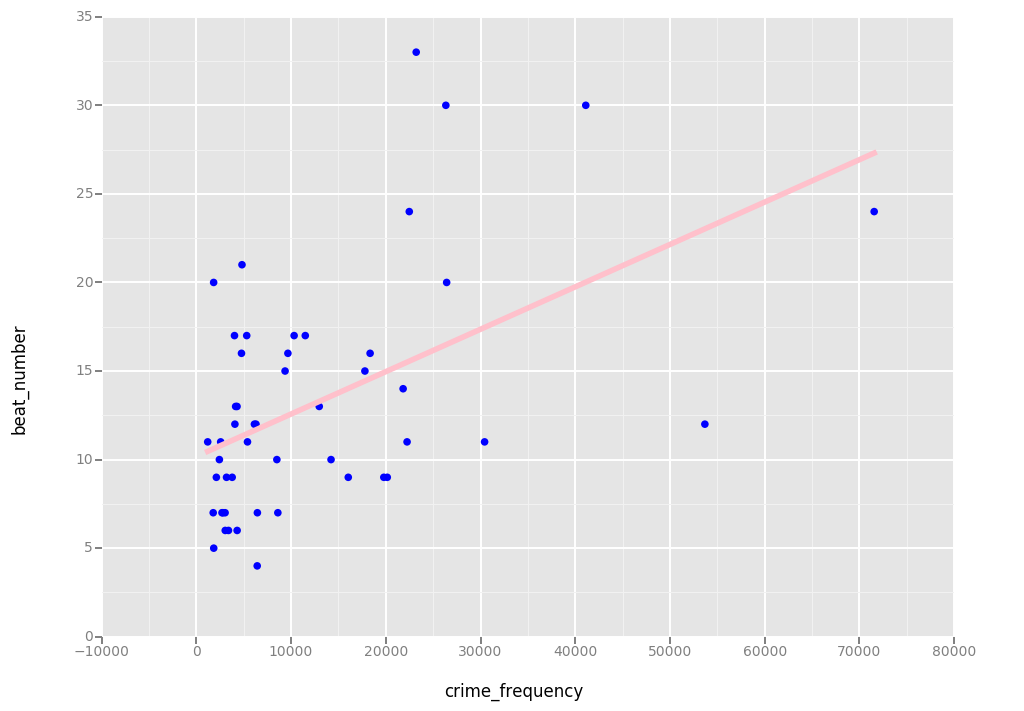

<ggplot: (-9223363267522309502)>


In [59]:
from ggplot import *
g = ggplot(Ward, aes('crime_frequency', 'beat_number'))
g = g + geom_point(size=30, color ='blue')
g = g + stat_smooth(method = "lm", color = 'pink', se = False, size=4)
print(g)

In [60]:
import statsmodels.formula.api as sm
result = sm.ols(formula=" beat_number~ crime_frequency", data=Ward).fit()

In [61]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            beat_number   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     16.32
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           0.000192
Time:                        19:57:21   Log-Likelihood:                -157.50
No. Observations:                  50   AIC:                             319.0
Df Residuals:                      48   BIC:                             322.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          10.1788      1.096     

### Conclusion 8: We assume that ward can represent police power in a sense because each beat has a dedicated police beat car. Based on the coefficient, which is 0.0002, we can give suggestion to Police Office in Chicago that if the crime frequency increase 10000 in one ward, they should put 2 more police power unit in that ward.

### 10. Relationship between beat number and arrested crime number among different wards.

In [6]:
!csvcut narcotics.csv | csvgrep -c9 -m 'true' > Arrest.csv

In [ ]:
! wc -l Arrest.csv

681611 Arrest.csv


In [11]:
Ward_beat_arrest = pd.read_csv("Arrest.csv", usecols = ['Beat','Ward'])
Ward_beat_arrest.groupby('Ward').count().to_csv("Ward_crime_arrest.csv")
Ward_crime_arrest = pd.read_csv("Ward_crime_arrest.csv")
Ward_crime_arrest.columns = ['Ward', 'crime_arrest_number']
Ward_arrest = Ward_crime_arrest.merge(Ward_Beat, left_on='Ward', right_on='Ward', how='inner')

In [12]:
Ward_crime_arrest.head()

,Ward,crime_arrest_number
0,1.0,4800
1,2.0,23011
2,3.0,26147
3,4.0,9461
4,5.0,10171


In [13]:
Ward_arrest.head()

,Ward,crime_arrest_number,beat_number
0,1.0,4800,21
1,2.0,23011,33
2,3.0,26147,30
3,4.0,9461,16
4,5.0,10171,17


/opt/conda/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


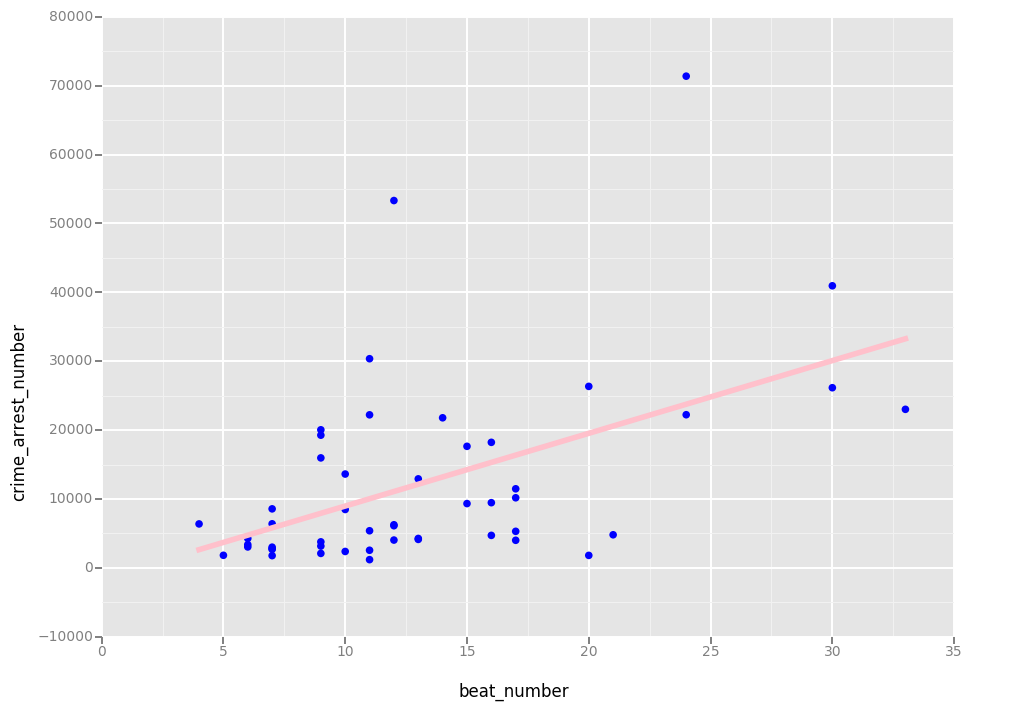

<ggplot: (-9223363242502421914)>


In [16]:
from ggplot import *
g = ggplot(Ward_arrest, aes('beat_number', 'crime_arrest_number'))
g = g + geom_point(size=30, color ='blue')
g = g + stat_smooth(method = "lm", color = 'pink', se = False, size=4)
print(g)

In [18]:
import statsmodels.formula.api as sm
result1 = sm.ols(formula=" crime_arrest_number~ beat_number", data=Ward_arrest).fit()
print(result1.summary())

                             OLS Regression Results                            
Dep. Variable:     crime_arrest_number   R-squared:                       0.254
Model:                             OLS   Adj. R-squared:                  0.238
Method:                  Least Squares   F-statistic:                     16.33
Date:                 Tue, 06 Dec 2016   Prob (F-statistic):           0.000192
Time:                         20:28:00   Log-Likelihood:                -539.87
No. Observations:                   50   AIC:                             1084.
Df Residuals:                       48   BIC:                             1088.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -1585.3424   3834.093     -0

### Conclusion 9: Basically, we can see that the when police power increases one unit in one ward, the number of crime end in arrest will increase around 1056. In conclusion, the increase of police power can improve the Capture efficiency.

### Bonus - Augment (10 points)
Sometimes the most value can be gained from one dataset when it is studied alongside data drawn from other
sources. Identify at least one additional data source that can complement your analysis. Pull this additional
data into your chosen environment and explore at least one more theme you are able to further analyze that
depends upon a combination of data from both sources.

We chose the dataset from https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2 which is "Selected socioeconomic indicators in Chicago(2008~2012)" dataset containing a selection of six socioeconomic indicators of public health significance and a “hardship index,” by Chicago community area, for the years 2008 – 2012. The indicators are the percent of occupied housing units with more than one person per room (i.e., crowded housing); the percent of households living below the federal poverty level; the percent of persons in the labor force over the age of 16 years that are unemployed; the percent of persons over the age of 25 years without a high school diploma; the percent of the population under 18 or over 64 years of age (i.e., dependency); and per capita income.

In [ ]:
!wget https://data.cityofchicago.org/api/views/kn9c-c2s2/rows.csv?accessType=DOWNLOAD

In [ ]:
!mv rows.csv?accessType=DOWNLOAD indicators.csv

In [ ]:
!csvcut -n indicators.csv

To combine this dataset with our original star schema model, we chose only six attributes which we consider useful for our further analysis of the influential factors of number of narcotics related crime in a certain community area : community area number, community area name, percent households below poverty, percent aged 16+ unemployed, percent aged 25+ without high school diploma and per capita income. 

In [ ]:
!csvcut -c1,2,4,5,6,8 indicators.csv > new.csv

In [ ]:
!csvstat new.csv

In [ ]:
%%sql
DROP TABLE IF EXISTS indicator;
CREATE TABLE indicator(
    community_area_num INTEGER,
    community_area_name VARCHAR(25),
    percent_below_property FLOAT,
    over_16_unemployed FLOAT,
    over_25_no_diploma FLOAT,
    per_capita_income FLOAT
);

In [ ]:
%%sql
COPY indicator FROM '/home/jovyan/work/new.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

In [ ]:
%%sql
SELECT *
FROM indicator
LIMIT 2;

Since this additional dataset contains the average level of each attributes from 2008 to 2012, we wrote a nested query to calculate the corresponding average number of narcotics crime in each community area and join with the additional dataset. 

In [ ]:
%%sql
SELECT community_area_num, community_area_name, AVG_crime_08_to_12, percent_below_property,over_16_unemployed,
        over_25_no_diploma,per_capita_income
FROM(
    SELECT DISTINCT Community_Area, ROUND(AVG(occurence_per_year_area) over (partition by Community_Area),2) AS AVG_crime_08_to_12
    FROM(
        SELECT year_create,Community_Area,COUNT(*) AS occurence_per_year_area
        FROM Narcotics_fact
        LEFT JOIN Location 
        ON Narcotics_fact.location_key = Location.location_key
        LEFT JOIN TIME
        ON Narcotics_fact.Time_key = Time.Time_key
        WHERE year_create LIKE '2008' OR year_create LIKE '2009' OR year_create LIKE '2010' 
            OR year_create LIKE '2011' OR year_create LIKE '2012'
        GROUP BY community_area,year_create) AS a
    WHERE Community_Area <> 0 AND Community_Area <> 999
    ORDER BY Community_Area) AS b
INNER JOIN indicator
ON b.Community_Area = indicator.community_area_num
ORDER BY percent_below_property ASC
LIMIT 20;

Based on the results above, we reached a general conclusion: intuitively, the smaller the percentage of households below poverty, the lower the average narcotics crime across all these 5 years; when per capita income is relatively high, the average number of narcotics crime is relatively low. 